# Starting Off

What is a variable you wanted to predict in your last project, but couldn't because it wasn't continuous and wouldn't work for for linear regression?

___

# Classification

Classification is the process of predicting a qualitative response. Methods used for classification often predict the probability of each of the categories of a qualitative variable as the basis for making the classification. 

With classification, we can answer questions like:
- A person has a set of symptoms that could be attributed to one of three medical conditions. Which one?
- Is a transaction fraudulent or not?

## Creating Classification Variables

*You are given the BMI of sample of people along with other data like their diet, exercise routine, and demographic factors. BMI is a continuous variable, but how could we structure our data to be a classification problem?*

## Classification Algorithms


In this section of the course we will go over many additional machine learning algorithms.  Some of them are specific to classification problems (k-nearest neighbors, naive bayes classifier), while others can be used with both classification and regression problems (decision tree, support vector machine, etc.).  


    - K-Nearest Neighbors
    - Logistic Regression
    - Ensemble Methods (Random Forest and XGBoost)
    - Support Vector Machine

## Evaluation 

There are multiple ways to evlauate a classification model when deciding how it generalizes to unseen data. The most straightforward way is the accuracy score - how many of your predicitons were correct. This score can be misleading though. Imagine a dataset where 90% of the obersvations belong to one class. Well you can get 90% accuracy by just always predicting the dominant class. There are additional scores that evlauate more specificall when you are right or wrong.  

**Classification Evlauation Metrics:**
    - Accuracy
    - Precision
    - Recall 
    - F1 Score
    - AUC Score

## Additional Considerations

- **Class imbalance:** How do you handle when one class dominates your observations. i.e. testing for a disease
- **Multiclass problems:** Some models are only made to predict binary categories and you have to do additional steps when predicting between 3 or more groups. 
- **Multilabel problems:** How do you handle it if the observation can belong to multiple groups. i.e. movie genres

# Implementing a K-Nearest Neighbors Model

## Objective: 
- To be able to implement a KNN classification model, and utilize a visualization to identify the best value of K.

## Agenda

- What is the **K-nearest neighbors** classification model?
- How do you use the sklearn grid search function?


## K-nearest neighbors (KNN) classification

- A simple model that classifies a new data point by looking at the data points 'nearest' to the new data point.
- KNN is an non parametric lazy learning algorithm.

**Lazy learning** or **Instance-based (IB)** learning methods simply store the training examples and postpone the generalization (building a model) until a new instance must be classified or prediction made.

**Non-parametric models** assume that the data distribution cannot be defined in
terms of such a finite set of parameters.

### How does the KNN algorithm work?


<img src='images/Knn_step_1.webp' width=500/>

Suppose P1 is the point, for which label needs to predict. 

First, you need to decide your size of $K$. $K$ is the number of nearest neighbors you want to tak into account when deciding how to classify the new data point.

Next, you need to find the $K$ nearest points. You find the distance between points using distance measures such as Euclidean distance, Hamming distance, Manhattan distance and Minkowski distance. 

Then you classify new points by 'majority vote' of its $K$ neighbors.  Each object votes for their class and the class with the most votes is taken as the prediction. 





<img src='images/KNN_final.webp' width=500/>

KNN has the following basic steps:

1. Determin number of neighbors
2. Calculate distance
3. Find closest neighbors
4. Vote for labels

### Example training data

This example uses a multi-class problem and each color represents a different class. 

### KNN classification map (K=1)

![1NN classification map](images/04_1nn_map.png)

### KNN classification map (K=5)

![5NN classification map](images/04_5nn_map.png)

### Euclidean Distance

**Euclidean distance** refers to the distance between two points. These points can be in different dimensional space and are represented by different forms of coordinates. In one-dimensional space, the points are just on a straight number line.



### Measuring distance in a 2-d Space

In two-dimensional space, the coordinates are given as points on the x- and y-axes

![alt text](images/euclidean-distance.png)

### Measuring distance in a 3-d Space

In three-dimensional space, x-, y- and z-axes are used. 

$$\sqrt{(x_1-x_2)^2 + (y_1-y_2)^2 +  (z_1-z_2)^2}$$
![alt text](images/vectorgraph.jpg)

### Euclidean Distance Equation
![alt text](images/euclidean-equation.png)

The source of this formula is in the Pythagorean theorem. 

### Voting

How to break ties:

1. When doing a binary classification, often use a odd K to avoid ties.
2. Multiple approaches for Multiclass problems:
    - Reduce the K by 1 to see who wins.
    - Weight the votes based on the distance of the neighbors

## Implementing the KNN Classifier with SKlearn

## Reviewing the Titanic dataset

We are using the Titanic dataset again. Instead of showing all of the cleanings steps, I have saved a cleaned version of the data for us to import

## Loading the data

In [2]:
import pandas as pd

titanic = pd.read_csv('cleaned_titanic.csv', index_col='PassengerId')

One thing that is new is I created a binary variable to classify passengars less than 10 years old.  I now need to convert that boolean into an integer

In [3]:
titanic['youngin'] = titanic['youngin'].astype('int')

In [4]:
titanic.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'youngin',
       'male', 'Q', 'S'],
      dtype='object')

In [5]:
titanic.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,youngin,male,Q,S
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,0.382452,2.311586,29.019314,0.524184,0.382452,32.096681,0.069741,0.649044,0.086614,0.724409
std,0.486260,0.834700,13.209814,1.103705,0.806761,49.697504,0.254854,0.477538,0.281427,0.447063
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800,0.000000,0.000000,0.000000,0.000000
50%,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200,0.000000,1.000000,0.000000,1.000000
75%,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000


In [6]:
# Split data to be used in the models
# Create matrix of features
X = titanic.drop('Survived', axis = 1) # grabs everything else but 'Survived'

# X = titanic[['Age', 'male', 'Q', 'S' ]]

# Create target variable
y = titanic['Survived'] # y is the column we're trying to predict

In [7]:
# print the shapes of X and y
print(X.shape)
print(y.shape)

(889, 9)
(889,)


In [8]:
# Use x and y variables to split the training data into train and test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Importance of Scaling

Compare how the different the data looks when it is scaled versus non-scaled


<img src='images/nonnormal.png' width=500/>

<img src='images/normalized.png' width=500/>

#### Should we use a Standard Scaler or Min-Max Scaler?

https://sebastianraschka.com/Articles/2014_about_feature_scaling.html
http://datareality.blogspot.com/2016/11/scaling-normalizing-standardizing-which.html

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

## scikit-learn 4-step modeling pattern

**Step 1:** Import the class you plan to use

In [10]:
from sklearn.neighbors import KNeighborsClassifier

**Step 2:** "Instantiate" the "estimator"

- "Estimator" is scikit-learn's term for model
- "Instantiate" means "make an instance of"

In [11]:
knn = KNeighborsClassifier(n_neighbors=1)

- Name of the object does not matter
- Can specify tuning parameters (aka "hyperparameters") during this step
- All parameters not specified are set to their defaults

In [12]:
print(knn)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')


**Step 3:** Fit the model with data (aka "model training")

- Model is learning the relationship between X and y
- Occurs in-place

In [13]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

**Step 4:** Predict the response for a new observation

- New observations are called "out-of-sample" data
- Uses the information it learned during the model training process

In [14]:
# make class predictions for the testing set
y_pred_class = knn.predict(X_test)

In [15]:
# calculate accuracy
from sklearn import metrics
print('Accuracy:' + str(metrics.accuracy_score(y_test, y_pred_class)))


Accuracy:0.8071748878923767


In [16]:
import matplotlib.pyplot as plt
import itertools
import numpy as np
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]

In [17]:

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix, without normalization
[[113  25]
 [ 18  67]]


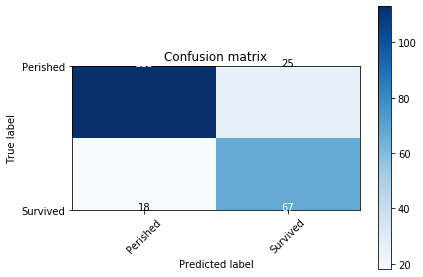

In [18]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_class)
classes = ['Perished', 'Survived']
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

## Using a different value for K

In [24]:
# instantiate the model (using a different value fopr K)
kseven = KNeighborsClassifier(n_neighbors=7)


# fit the model with data
kseven.fit(X_train, y_train)

# make class predictions for the testing set
y_pred_class = kseven.predict(X_test)

In [25]:
print('Accuracy:' + str(metrics.accuracy_score(y_test, y_pred_class)))


Accuracy:0.8385650224215246


Confusion Matrix, without normalization
[[124  14]
 [ 22  63]]


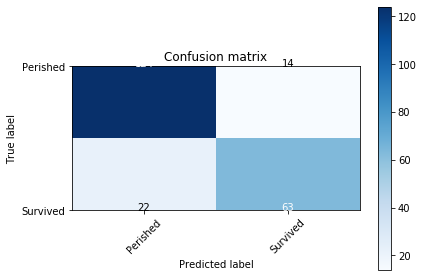

In [26]:
cm = confusion_matrix(y_test,y_pred_class)
classes = ['Perished', 'Survived']
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

#### Write a function to search for an optimal value of K for KNN


In [29]:
#create a container to track the scores
k_scores=[]

#set up a loop to fit the model using a different values of K

k_range = list(range(1,120 ))
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    k_scores.append(metrics.accuracy_score(y_test, knn.predict(X_test)))
    #fit the model and get the score on a evaluation metric
print(k_scores)
    # Print out the scores to see which one is best. 

[0.8071748878923767, 0.8340807174887892, 0.820627802690583, 0.8295964125560538, 0.8295964125560538, 0.8340807174887892, 0.8385650224215246, 0.8430493273542601, 0.852017937219731, 0.852017937219731, 0.8475336322869955, 0.8295964125560538, 0.8116591928251121, 0.8295964125560538, 0.820627802690583, 0.8295964125560538, 0.8251121076233184, 0.8161434977578476, 0.820627802690583, 0.8161434977578476, 0.820627802690583, 0.820627802690583, 0.8161434977578476, 0.8251121076233184, 0.7982062780269058, 0.8026905829596412, 0.7937219730941704, 0.8026905829596412, 0.7847533632286996, 0.7982062780269058, 0.7757847533632287, 0.7982062780269058, 0.7623318385650224, 0.7802690582959642, 0.7892376681614349, 0.7892376681614349, 0.7892376681614349, 0.7892376681614349, 0.7847533632286996, 0.7847533632286996, 0.7892376681614349, 0.7802690582959642, 0.7802690582959642, 0.7757847533632287, 0.7802690582959642, 0.7892376681614349, 0.7892376681614349, 0.7892376681614349, 0.7802690582959642, 0.7847533632286996, 0.7847

#### Visual comparison of different $K$s

This is not an ROC curve

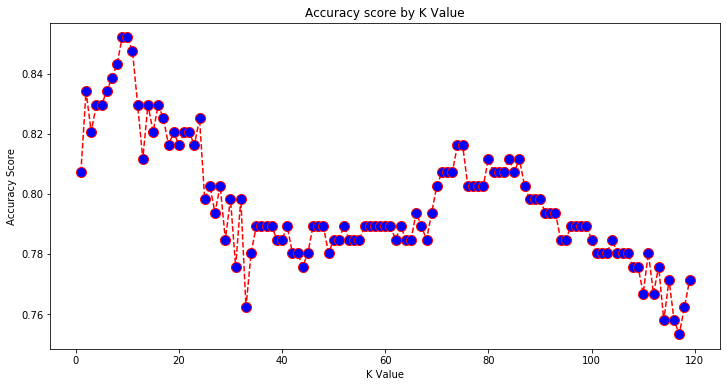

In [30]:
import matplotlib.pyplot as plt  

plt.figure(figsize=(12, 6))  
plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Accuracy score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('Accuracy Score') 
plt.show()

### What value of K performs best on our Test data?

### How do you think K size relates to our concepts of bias and variance?

___

![alt text](images/K-NN_Neighborhood_Size_print.png)

## Resources

- [Nearest Neighbors](http://scikit-learn.org/stable/modules/neighbors.html) (user guide), [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) (class documentation)

- [Videos from An Introduction to Statistical Learning](http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/)
    - Classification Problems and K-Nearest Neighbors (Chapter 2)
    - Introduction to Classification (Chapter 4)
    - Logistic Regression and Maximum Likelihood (Chapter 4)